In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import os
import sys

In [2]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [5]:
from scripts.load_data import load_data
news_path = '../Data/raw_analyst_ratings.csv'
stock_path = '../Data/AAPL_historical_data.csv'
aligned_data = load_data(news_path, stock_path)
# stock_data = stock_data.rename(columns={'Date': 'date'})

In [6]:
aligned_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,81.165001,81.550003,80.574997,81.279999,79.287506,104491200,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,80.875000,81.059998,79.125000,79.182503,77.241432,125522000,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0


In [24]:
aligned_data.head()

AttributeError: 'tuple' object has no attribute 'head'

In [21]:
from scripts.convert_and_align_date import convert_and_align_dates
aligned_data = convert_and_align_dates(news_data, stock_data, 'date')
aligned_data.head()

ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 10:30:54-04:00", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [14]:
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce', utc='True')
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


In [15]:
from scripts.convert_and_align_date import convert_and_align_dates
aligned_data = convert_and_align_dates(news_data, stock_data, 'date')
aligned_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,81.165001,81.550003,80.574997,81.279999,79.287506,104491200,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,80.875000,81.059998,79.125000,79.182503,77.241432,125522000,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0


In [10]:
stock_data = stock_data.rename(columns={'Date': 'date'})

stock_data.head()

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [11]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [12]:
from scripts.convert_and_align_date import convert_and_align_dates
aligned_data = convert_and_align_dates(news_data, stock_data, 'date')
aligned_data.head()

ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 10:30:54-04:00", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [203]:
from textblob import TextBlob

# Function to get sentiment score
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to headlines
aligned_data['sentiment'] = aligned_data['headline'].apply(get_sentiment)

# Display the DataFrame with sentiment scores
print(aligned_data[['headline', 'sentiment']].head())


                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0


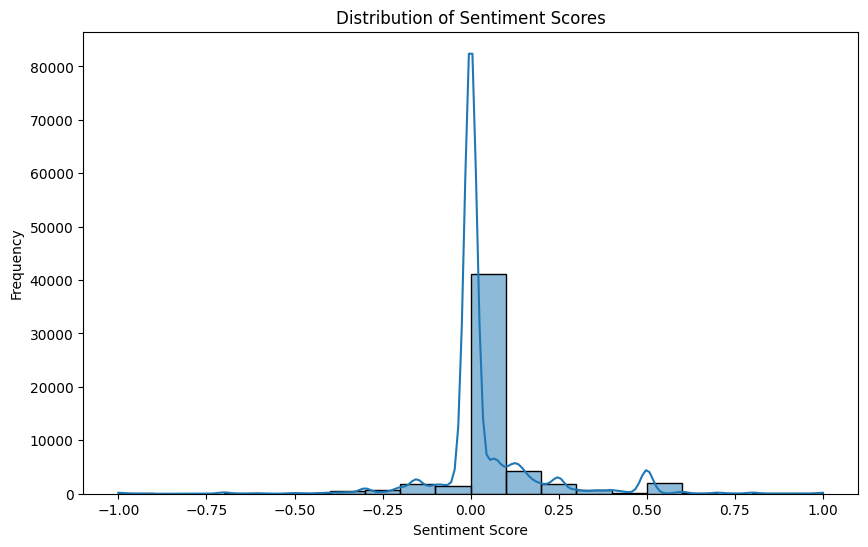

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(aligned_data['sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [204]:
# Calculate daily stock returns
aligned_data['daily_return'] = aligned_data['Close'].pct_change()

# Drop the first row with NaN values due to pct_change()
aligned_data = aligned_data.dropna()

# Display the DataFrame with daily returns
print(aligned_data[['date', 'Close', 'daily_return']].head())


        date      Close  daily_return
1 2020-06-03  81.279999     -0.019246
2 2020-05-26  79.182503     -0.025806
3 2020-05-22  79.722504      0.006820
4 2020-05-22  79.722504      0.000000
5 2020-05-22  79.722504      0.000000


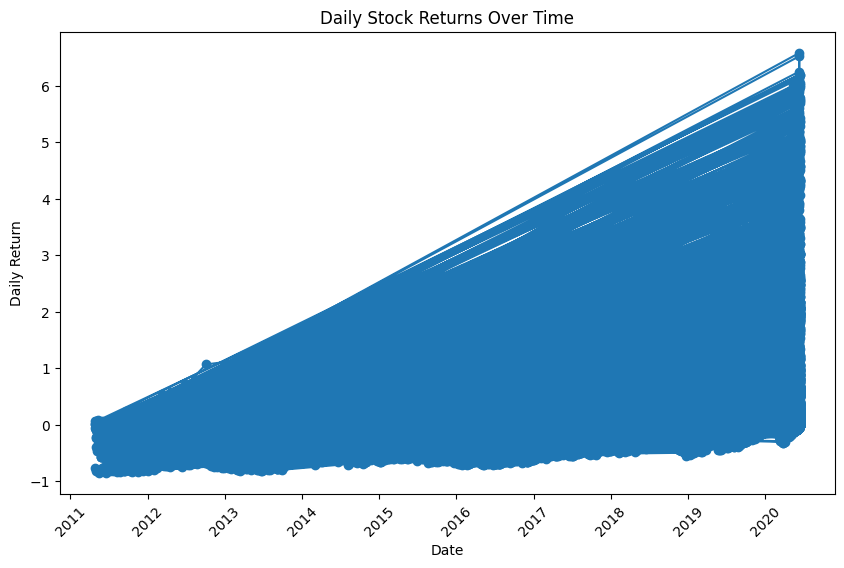

In [210]:
# Daily Returns Over Time
plt.figure(figsize=(10, 6))
plt.plot(aligned_data['date'], aligned_data['daily_return'], marker='o', linestyle='-')
plt.title('Daily Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.xticks(rotation=45)
plt.show()


In [213]:
# Group by date and calculate the mean sentiment score
daily_sentiment = aligned_data.groupby('date')['sentiment'].mean().reset_index()

# Merge with daily returns
final_data = pd.merge(daily_sentiment, aligned_data[['date', 'daily_return']], on='date')

# Display the final dataset
print(final_data.head())


        date  sentiment  daily_return
0 2011-04-27   0.000000      0.010067
1 2011-04-28   0.068182      0.065939
2 2011-04-28   0.068182      0.018266
3 2011-04-29   0.166667     -0.063072
4 2011-04-29   0.166667     -0.765523


In [215]:
correlation = final_data['sentiment'].corr(final_data['daily_return'])
print(f"Correlation between daily sentiment scores and stock returns: {correlation}")


Correlation between daily sentiment scores and stock returns: -0.024900265784058753


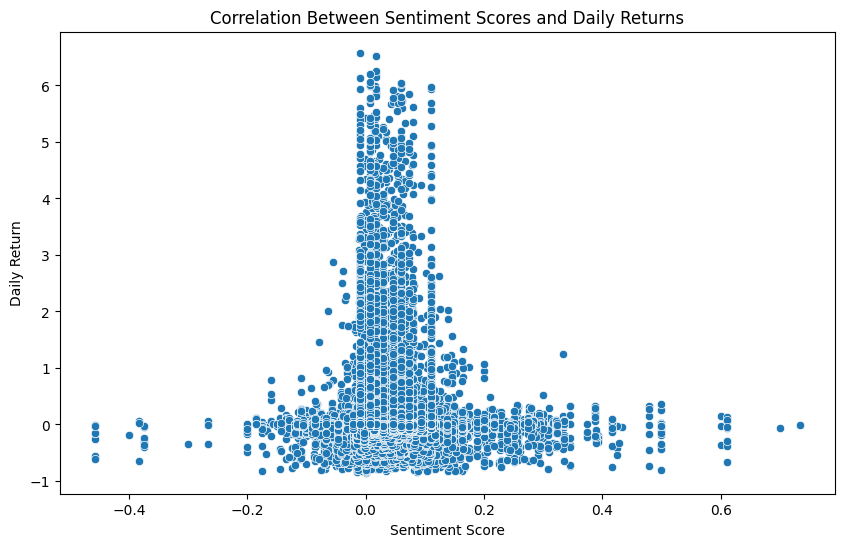

In [218]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment', y='daily_return', data=final_data)
plt.title('Correlation Between Sentiment Scores and Daily Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.show()


ADD VISUALIZATIONS

In [220]:
# Calculate rolling averages
window_size = 7  # Number of days for rolling average

final_data['rolling_sentiment'] = final_data['sentiment'].rolling(window=window_size).mean()
final_data['rolling_return'] = final_data['daily_return'].rolling(window=window_size).mean()


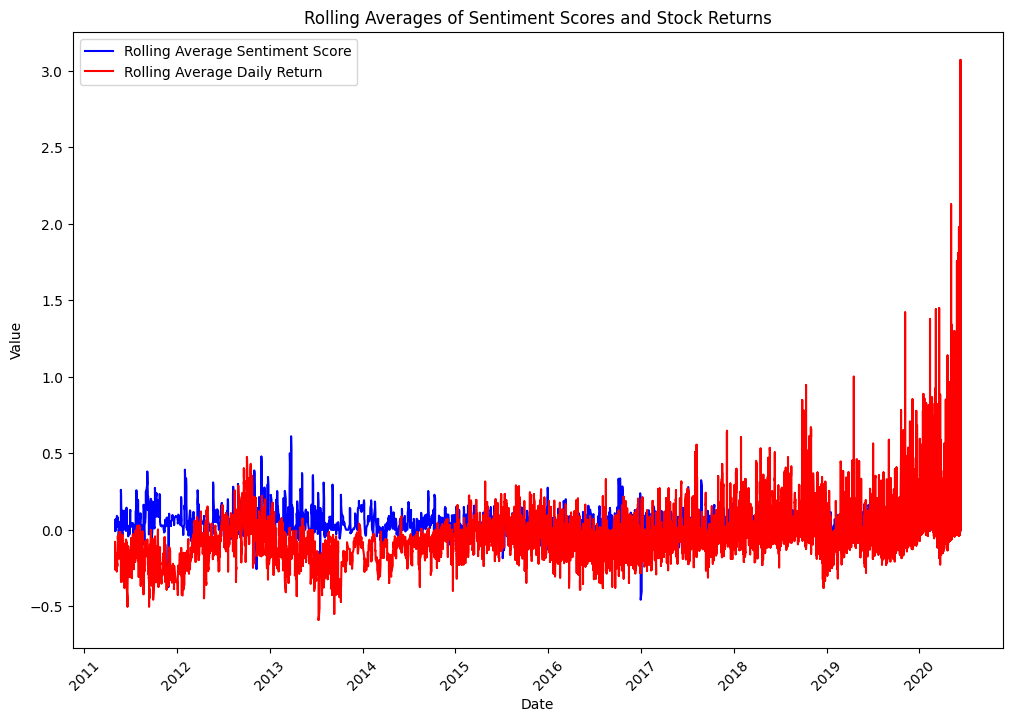

In [221]:
plt.figure(figsize=(12, 8))
plt.plot(final_data['date'], final_data['rolling_sentiment'], label='Rolling Average Sentiment Score', color='blue')
plt.plot(final_data['date'], final_data['rolling_return'], label='Rolling Average Daily Return', color='red')
plt.title('Rolling Averages of Sentiment Scores and Stock Returns')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [223]:
correlation_matrix = final_data[['sentiment', 'daily_return']].corr()

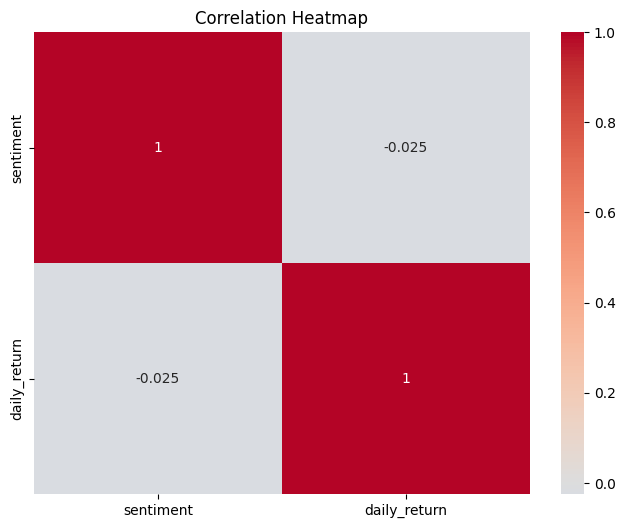

In [224]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()
